In [34]:
from io import BufferedReader, open

In [36]:
import google.protobuf.internal.decoder as decoder

In [38]:
def ReadItm(fname, constructor, size_limit = 0):
    ''' Reads and parses a length prefixed protobuf messages from file. 
        The file MUST not be corrupted. The parsing is equivalent to parseDelimitedFrom.
        http://dev.pawelsz.eu/2016/05/read-from-file-length-prefixed-protocol.html
    '''
    f = None
    if fname.endswith('.gzip'):
        f = gzip.open(fname, 'rb')
    else:
        f = open(fname, 'rb')
    reader = BufferedReader(f)
    bytes_read = 0
    while size_limit<=0 or bytes_read<size_limit:
        buffer = reader.peek(10)
        if len(buffer) == 0:
            break
        (size, position) = decoder._DecodeVarint(buffer, 0)
        reader.read(position)
        itm = constructor()
        itm.ParseFromString(reader.read(size))
        bytes_read = bytes_read + position + size
        yield itm
    f.close()

In [39]:
import results_pb2

In [54]:
import matplotlib.pyplot as plt

In [56]:
%matplotlib inline

In [90]:
aaa = ReadItm('/Users/sofroniewn/github/app-mvr/sessions/000000/behavior/session.results', results_pb2.Data)

In [91]:
abb = [x.elapsedTime/1000.0 for x in aaa]

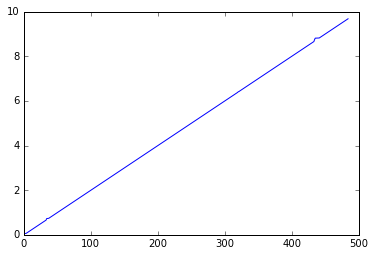

In [92]:
plt.plot(abb)

In [24]:
f = open('session.results', 'rb')

In [26]:
reader = BufferedReader(f)

AttributeError: 'file' object has no attribute 'readable'

In [15]:
def double(L):
    for x in L:
        yield x*2

In [17]:
list(double([1, 2, 3]))

[2, 4, 6]